# Sensitivity analysis

In [1]:
from ipywidgets import widgets, interact
from IPython.display import display
%matplotlib inline
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
sbn.set_context("talk", font_scale=1)

## One-at-time approach

In [2]:
def net_charge(number_hydrocarbons,
                      OH_presence,
                      methyl_presence,
                      kind_cyclic_group,
                      ):

    charge = (1-kind_cyclic_group)*((1-OH_presence-methyl_presence)
                                    *(-4.3131533177636045e-05*number_hydrocarbons**2+7.189198164797467e-05*number_hydrocarbons+0.0038542476649435064)
                                    +OH_presence*(-2.9279335437346392e-05*number_hydrocarbons**2-2.626614827869593e-05*number_hydrocarbons+0.0038799300226075393)
                                    +methyl_presence*(-1.3410325451093164e-05*number_hydrocarbons**2-8.808402312581239e-05*number_hydrocarbons+0.0038648742951322076))+(kind_cyclic_group)*((1-OH_presence-methyl_presence)
                                    *(-3.373546151217617e-05*number_hydrocarbons**2+7.235655165084726e-05*number_hydrocarbons+0.0038517485102224918)
                                    +OH_presence*(-3.78941730488476e-05*number_hydrocarbons**2+5.2001623298689645e-05*number_hydrocarbons+0.0038541979320091645)
                                    +methyl_presence*(-1.3719600438106818e-05*number_hydrocarbons**2-7.631523762579333e-05*number_hydrocarbons+0.003936929800350617))
 
    return charge

In [3]:
@interact(number_hydrocarbons=widgets.FloatSlider(value=2, min=0, max=4, step=1), 
          OH_presence=widgets.FloatSlider(value=0, min=0, max=1, step=1), 
          methyl_presence=widgets.FloatSlider(value=0, min=0, max=1, step=1), 
          kind_cyclic_group=widgets.FloatSlider(value=0, min=0, max=1, step=1))

def plot_charge(number_hydrocarbons,
                      OH_presence,
                      methyl_presence,
                      kind_cyclic_group,
                      ):
    
    charge = net_charge(number_hydrocarbons,
                      OH_presence,
                      methyl_presence,
                      kind_cyclic_group,
                      )
    
    return print("The net charge is {}".format(round(charge, 15)))

# When OH_presence = 0, there is not hydroxil group in the cation.
# When OH_presence = 1, there is hydroxil group in the cation.
# When methyl_presence = 0, there is not methyl group in the cation.
# When methyl_presence = 1, there is methyl group in the cation.
# When kind_cyclic_group = 0, the cyclic group is pyridinium.
# When kind_cyclic_group = 1, the cyclic group is imidazole.

A Jupyter Widget

## Scatter plots


In [4]:
def net_charge(number_hydrocarbons,
                      OH_presence,
                      methyl_presence,
                      kind_cyclic_group,
                      ):

    charge = (1-kind_cyclic_group)*((1-OH_presence-methyl_presence)
                                    *(-4.3131533177636045e-05*number_hydrocarbons**2+7.189198164797467e-05*number_hydrocarbons+0.0038542476649435064)
                                    +OH_presence*(-2.9279335437346392e-05*number_hydrocarbons**2-2.626614827869593e-05*number_hydrocarbons+0.0038799300226075393)
                                    +methyl_presence*(-1.3410325451093164e-05*number_hydrocarbons**2-8.808402312581239e-05*number_hydrocarbons+0.0038648742951322076))+(kind_cyclic_group)*((1-OH_presence-methyl_presence)
                                    *(-3.373546151217617e-05*number_hydrocarbons**2+7.235655165084726e-05*number_hydrocarbons+0.0038517485102224918)
                                    +OH_presence*(-3.78941730488476e-05*number_hydrocarbons**2+5.2001623298689645e-05*number_hydrocarbons+0.0038541979320091645)
                                    +methyl_presence*(-1.3719600438106818e-05*number_hydrocarbons**2-7.631523762579333e-05*number_hydrocarbons+0.003936929800350617))
 
    return charge

In [5]:
number_sims = 1000

# Make some random data in the correct ranges
mc_number_hydrocarbons = np.random.uniform(0, 4, number_sims)
mc_OH_presence = np.random.uniform(0, 1, number_sims)
mc_methyl_presence = np.random.uniform(0, 1, number_sims)
mc_kind_cyclic_group = np.random.uniform(0, 1, number_sims)

data = np.array((mc_number_hydrocarbons, 
                 mc_OH_presence, 
                 mc_methyl_presence, 
                 mc_kind_cyclic_group 
                 ))

In [16]:
y = net_charge(mc_number_hydrocarbons, 
                 mc_OH_presence, 
                 mc_methyl_presence, 
                 mc_kind_cyclic_group)

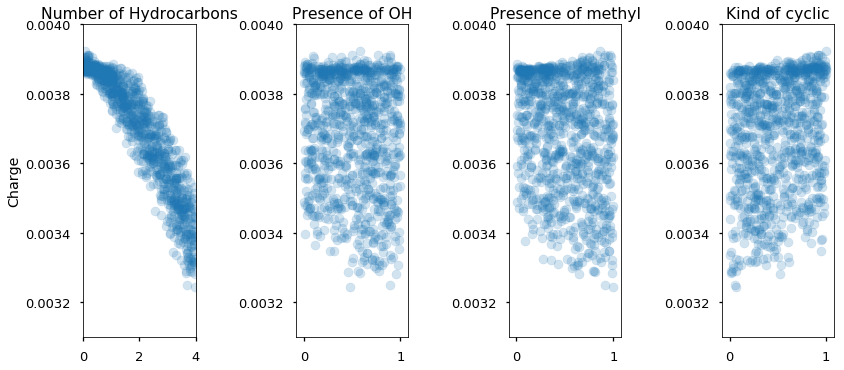

In [17]:
# Make some scatter plots to compare the results
plt.subplot(241)
plt.scatter(mc_number_hydrocarbons, y, alpha=0.2)
plt.title("Number of Hydrocarbons")
plt.ylabel("Charge")
plt.ylim(0.0031, 0.0040)
plt.xlim(0, 4)

plt.subplot(242)
plt.scatter(mc_OH_presence, y, alpha=0.2)
plt.title("Presence of OH")
plt.ylim(0.0031, 0.0040)

plt.subplot(243)
plt.scatter(mc_methyl_presence, y, alpha=0.2)
plt.title("Presence of methyl")
plt.ylim(0.0031, 0.0040)

plt.subplot(244)
plt.scatter(mc_kind_cyclic_group, y, alpha=0.2)
plt.title("Kind of cyclic")
plt.ylim(0.0031, 0.0040)

plt.tight_layout()

Text(0,0.5,'Frequency')

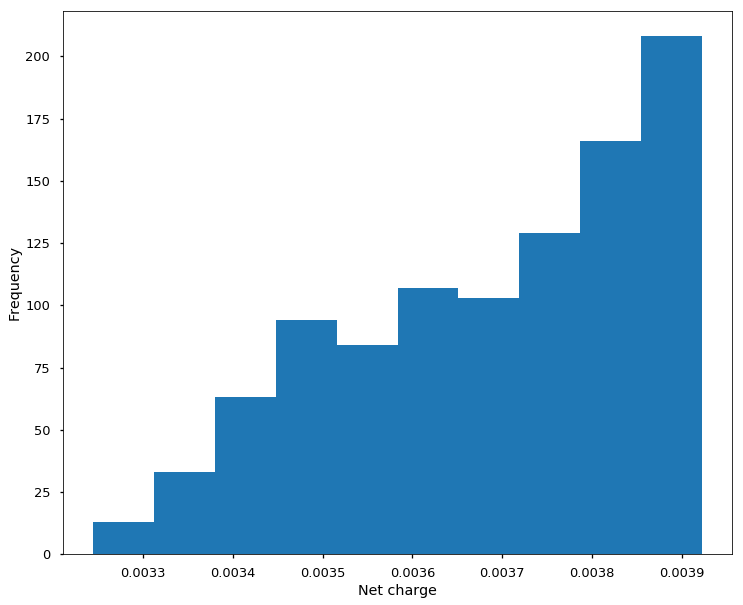

In [18]:
plt.hist(y)
plt.xlabel("Net charge")
plt.ylabel("Frequency")

# Using SALib to run a Sensitivity Analysis

In [19]:
import SALib
from SALib.sample import morris as ms
from SALib.analyze import morris as ma
from SALib.plotting import morris as mp

In [20]:
morris_problem = {
    # There are four variables
    'num_vars': 4,
    # These are their names
    'names': ['Hydrocarbon group length', 'OH presence', 'Methyl presence', 'Kind of cycle'],
    # These are their plausible ranges over which we'll move the variables
    'bounds': [[0, 4], # Number of Hydrocarbons
               [0, 1], # Presence of OH
               [0, 1], # Presence of methyl
               [0, 1], # Kind of cyclic
              ],
    # I don't want to group any of these variables together
    'groups': None
    }

In [21]:
num_levels = 10
grid_jump = 1
trajectories = int(1e4)
sample = ms.sample(morris_problem, trajectories, num_levels, grid_jump)
sample.shape

(50000, 4)

In [22]:
print(sample.T.shape)
print(sample.T)

(4, 50000)
[[1.77777778 1.77777778 1.33333333 ... 1.77777778 1.77777778 1.77777778]
 [0.55555556 0.55555556 0.55555556 ... 0.66666667 0.66666667 0.66666667]
 [0.66666667 0.55555556 0.55555556 ... 0.66666667 0.55555556 0.55555556]
 [0.22222222 0.22222222 0.22222222 ... 0.         0.         0.11111111]]


In [23]:
# Run the sample through the power model
output = net_charge(*sample.T)
print(output.shape)
print(output)

(50000,)
[0.00369037 0.00370878 0.00376364 ... 0.00365582 0.0036758  0.00368717]


In [24]:
# Store the results for plotting of the analysis
Si = ma.analyze(morris_problem, 
                sample, 
                output, 
                print_to_console=False, 
                grid_jump=grid_jump, 
                num_levels=num_levels)
print("{:20s} {:>7s} {:>7s} {:>7s}".format("Name", "mu", "mu_star", "sigma"))
for name, s1, st, mean in zip(morris_problem['names'], Si['mu'], Si['mu_star'], Si['sigma']):
    print("{:20s} {:=7.4f} {:=7.5f}  {:=7.5f}".format(name, s1, st, mean))

Name                      mu mu_star   sigma
Hydrocarbon group length -0.0005 0.00052  0.00024
OH presence          -0.0001 0.00008  0.00005
Methyl presence      -0.0001 0.00013  0.00007
Kind of cycle         0.0001 0.00009  0.00004


(0, 0.0007)

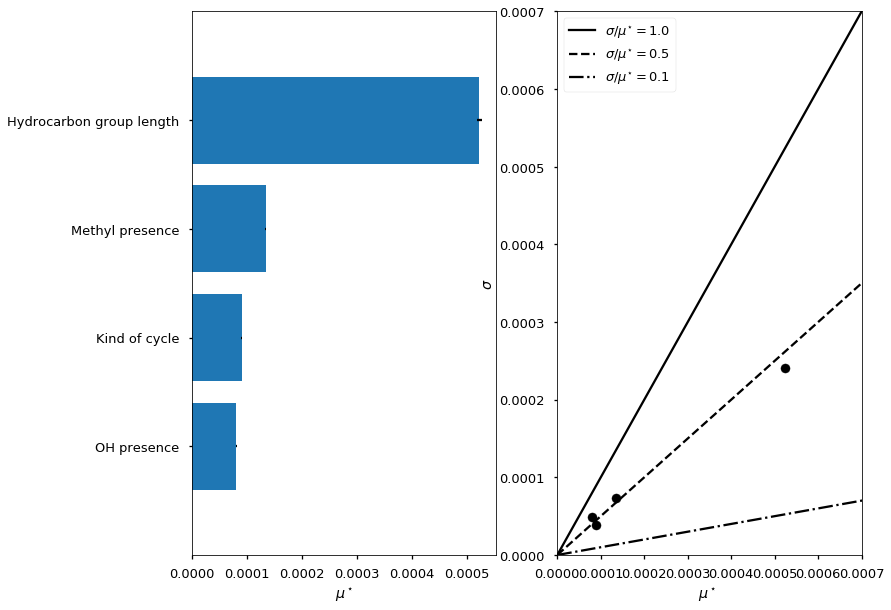

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2)
mp.horizontal_bar_plot(ax1, Si, param_dict={})
mp.covariance_plot(ax2, Si, {})
plt.xlim(0, 0.0007)
plt.ylim(0, 0.0007)